<a href="https://colab.research.google.com/github/hanafimajidd/tpot-mtr/blob/main/scm20d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 637.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=57417773def84528c16270f60ab2938c14ba456723f5d2ae1616d61638655ae2
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-scm20d.csv to csv_result-scm20d.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-scm20d.csv")
df.head()
y_col = [
'LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
0,1424,1519,1507,1581,1879,1776,1747,1905,1414,1336,1409,1535,1795,1871,1783,1649
1,1432,1688,1532,1639,1904,1841,1794,2060,1270,1404,1405,1486,1786,2077,1803,1650
2,1391,1612,1547,1599,1977,1853,1774,1876,1397,1444,1400,1505,1871,2050,1751,1653
3,1424,1544,1414,1558,1937,1879,1760,1820,1315,1477,1419,1546,1833,2070,1798,1645
4,1444,1536,1499,1598,1915,1854,1780,1846,1435,1412,1305,1455,1847,2024,1775,1646


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler



In [ ]:
from tpot import TPOTRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=5,verbosity=2, random_state=123,n_jobs=-1,max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)




Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.005805070929312724

Generation 2 - Current best internal CV score: -0.005300703526274233

Generation 3 - Current best internal CV score: -0.005213228253985186

Generation 4 - Current best internal CV score: -0.005196239791727821

Generation 5 - Current best internal CV score: -0.005196239791727821

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.85, learning_rate=0.1, loss=huber, max_depth=3, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006140261889428013

Generation 2 - Current best internal CV score: -0.006136151483671214

Generation 3 - Current best internal CV score: -0.005805199654985977

Generation 4 - Current best internal CV score: -0.0021873205400118633

Generation 5 - Current best internal CV score: -0.0021873205400118633

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006240909840904828

Generation 2 - Current best internal CV score: -0.006216254089983524

Generation 3 - Current best internal CV score: -0.005824660906372504

Generation 4 - Current best internal CV score: -0.0022859797434153306

Generation 5 - Current best internal CV score: -0.0022859797434153306

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007573433677403256

Generation 2 - Current best internal CV score: -0.007551504601778569

Generation 3 - Current best internal CV score: -0.006760076833191587

Generation 4 - Current best internal CV score: -0.0026824562490370416

Generation 5 - Current best internal CV score: -0.0026824562490370416

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.009167631132227402

Generation 2 - Current best internal CV score: -0.004841970836475801

Generation 3 - Current best internal CV score: -0.004107798479639105

Generation 4 - Current best internal CV score: -0.004107798479639105

Generation 5 - Current best internal CV score: -0.004107798479639105

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008352616533723413

Generation 2 - Current best internal CV score: -0.004576212699274367

Generation 3 - Current best internal CV score: -0.004132838263949041

Generation 4 - Current best internal CV score: -0.004132838263949041

Generation 5 - Current best internal CV score: -0.004132838263949041

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.009530747481487595

Generation 2 - Current best internal CV score: -0.004901615776491422

Generation 3 - Current best internal CV score: -0.004537677823272812

Generation 4 - Current best internal CV score: -0.004537677823272812

Generation 5 - Current best internal CV score: -0.0044666302048457195

Best pipeline: XGBRegressor(ZeroCount(RobustScaler(input_matrix)), learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007829112256699928

Generation 2 - Current best internal CV score: -0.00412119144810447

Generation 3 - Current best internal CV score: -0.0037019911698654437

Generation 4 - Current best internal CV score: -0.0037019911698654437

Generation 5 - Current best internal CV score: -0.0037019911698654437

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006561289782088716

Generation 2 - Current best internal CV score: -0.006527168635991236

Generation 3 - Current best internal CV score: -0.005438449141687406

Generation 4 - Current best internal CV score: -0.00538665361439874

Generation 5 - Current best internal CV score: -0.00538665361439874

Best pipeline: GradientBoostingRegressor(RobustScaler(input_matrix), alpha=0.95, learning_rate=0.1, loss=huber, max_depth=4, max_features=0.9500000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007283576859183574

Generation 2 - Current best internal CV score: -0.0035891154833205528

Generation 3 - Current best internal CV score: -0.003520816240626568

Generation 4 - Current best internal CV score: -0.003520816240626568

Generation 5 - Current best internal CV score: -0.0034620027796604383

Best pipeline: XGBRegressor(ZeroCount(RobustScaler(input_matrix)), learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006367456997734873

Generation 2 - Current best internal CV score: -0.0030514428971368567

Generation 3 - Current best internal CV score: -0.0030514428971368567

Generation 4 - Current best internal CV score: -0.0030514428971368567

Generation 5 - Current best internal CV score: -0.0030514428971368567

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=13, p=2, weights=distance)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.006841176546345082

Generation 2 - Current best internal CV score: -0.0034530800373356652

Generation 3 - Current best internal CV score: -0.0034530800373356652

Generation 4 - Current best internal CV score: -0.0034105482432971027

Generation 5 - Current best internal CV score: -0.0023593731066228574

Best pipeline: KNeighborsRegressor(MinMaxScaler(input_matrix), n_neighbors=13, p=2, weights=distance)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007811224231748551

Generation 2 - Current best internal CV score: -0.007772944074436171

Generation 3 - Current best internal CV score: -0.006288636901148057

Generation 4 - Current best internal CV score: -0.00545712808399881

Generation 5 - Current best internal CV score: -0.003566362309381908

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=9, min_samples_split=3, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00466639289462298

Generation 2 - Current best internal CV score: -0.0023550326947399175

Generation 3 - Current best internal CV score: -0.0022850371186765228

Generation 4 - Current best internal CV score: -0.0022850371186765228

Generation 5 - Current best internal CV score: -0.0022850371186765228

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=9, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0077680790035206115

Generation 2 - Current best internal CV score: -0.007757655731115171

Generation 3 - Current best internal CV score: -0.006860379043506079

Generation 4 - Current best internal CV score: -0.0026701213728193146

Generation 5 - Current best internal CV score: -0.0026701213728193146

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008530324340023317

Generation 2 - Current best internal CV score: -0.008517815799423978

Generation 3 - Current best internal CV score: -0.007512246426628492

Generation 4 - Current best internal CV score: -0.003028678973240154

Generation 5 - Current best internal CV score: -0.003028678973240154

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


0.8423586741537099

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")


RMSE  is 103.58534886644092
MAE is 69.13235957858687
rmse_per_output: [109.83963772  68.14742986  72.19017159  80.13576667 109.0423363
 120.37705717 120.10200002 133.87317594 109.11555704  97.14088041
  86.00218738  80.79171677 112.67699677 124.31467135  95.28854169
 110.05927816]
arrmse = 0.000402633510707598
Percentage arrmse = 0.04%


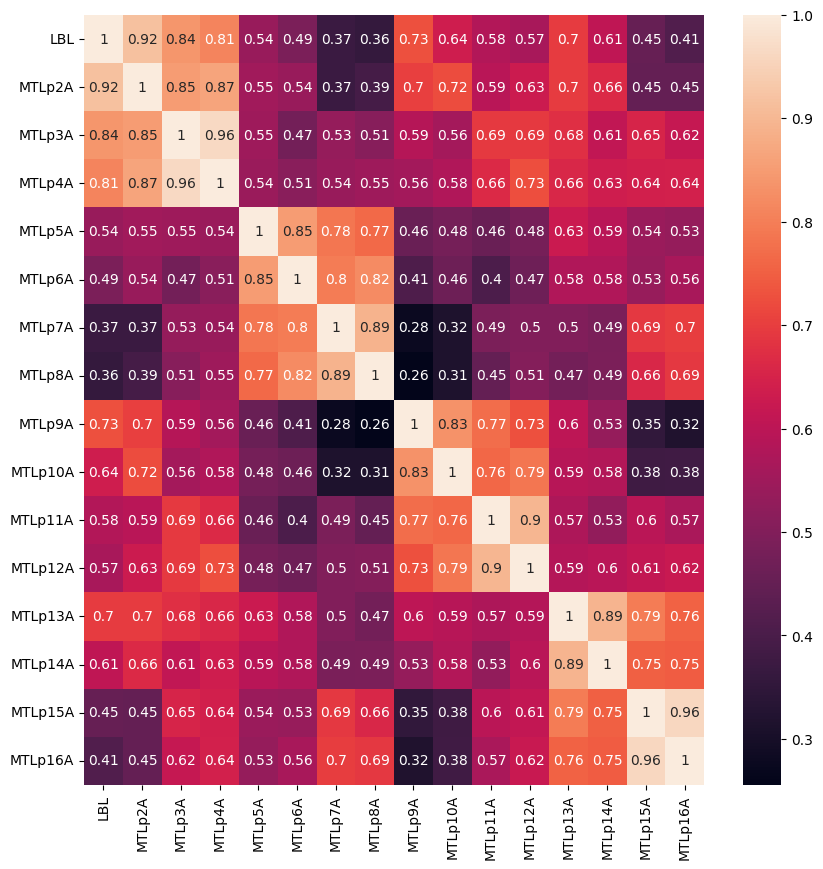

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-scm20d.csv")
df.head()
y_col = [
'LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
0,1424,1519,1507,1581,1879,1776,1747,1905,1414,1336,1409,1535,1795,1871,1783,1649
1,1432,1688,1532,1639,1904,1841,1794,2060,1270,1404,1405,1486,1786,2077,1803,1650
2,1391,1612,1547,1599,1977,1853,1774,1876,1397,1444,1400,1505,1871,2050,1751,1653
3,1424,1544,1414,1558,1937,1879,1760,1820,1315,1477,1419,1546,1833,2070,1798,1645
4,1444,1536,1499,1598,1915,1854,1780,1846,1435,1412,1305,1455,1847,2024,1775,1646


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
#scaler=StandardScaler()
# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
#reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000000)
reg=LinearSVR(C=0.1, dual=False, fit_intercept=True, max_iter=1000,random_state=123,loss='squared_epsilon_insensitive')
chain = RegressorChain(base_estimator=reg, order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

0.5809204932928247

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 172.19664907267017
MAE is 127.36152577499452
rmse_per_output: [123.02622825 134.47055439 135.23904029 151.91600287 187.50198492
 202.21794773 207.66881317 227.85448442 131.37366046 152.56167725
 142.63517062 149.76767203 179.42257615 193.57151024 189.01463086
 200.12459889]
arrmse = 0.0006705421050210063
Percentage arrmse = 0.07%


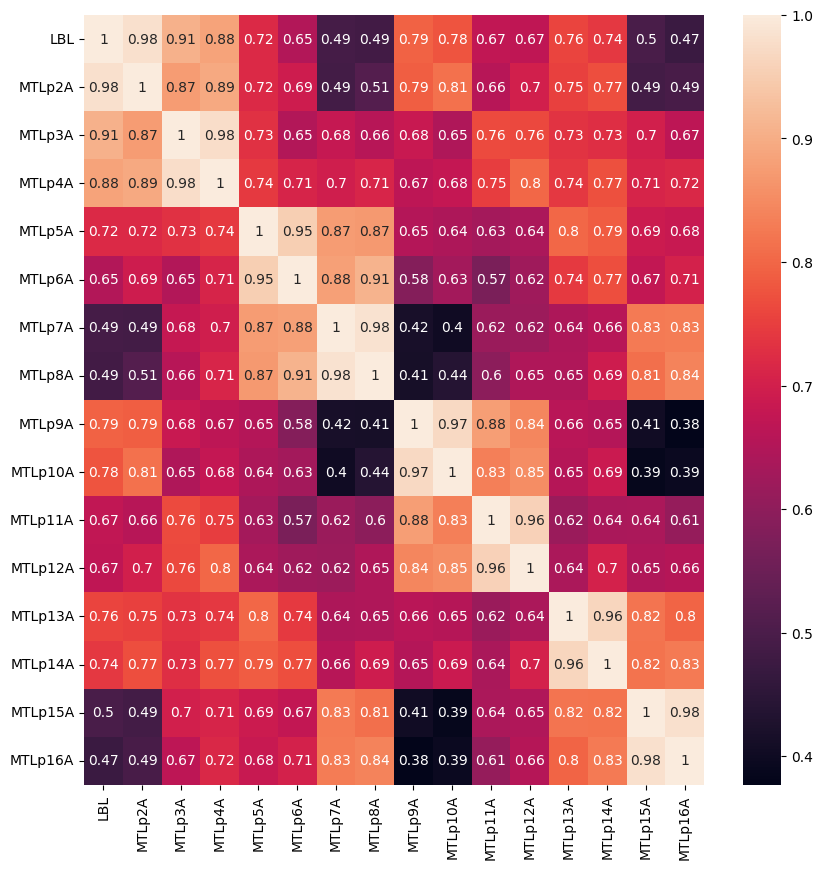

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-scm20d.csv")
df.head()
y_col = [
'LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
0,1424,1519,1507,1581,1879,1776,1747,1905,1414,1336,1409,1535,1795,1871,1783,1649
1,1432,1688,1532,1639,1904,1841,1794,2060,1270,1404,1405,1486,1786,2077,1803,1650
2,1391,1612,1547,1599,1977,1853,1774,1876,1397,1444,1400,1505,1871,2050,1751,1653
3,1424,1544,1414,1558,1937,1879,1760,1820,1315,1477,1419,1546,1833,2070,1798,1645
4,1444,1536,1499,1598,1915,1854,1780,1846,1435,1412,1305,1455,1847,2024,1775,1646


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTRegressor
from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=5, population_size=5,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0058144323820003745

Generation 2 - Current best internal CV score: -0.005297963401933807

Generation 3 - Current best internal CV score: -0.005247987153167999

Generation 4 - Current best internal CV score: -0.005150900100828222

Generation 5 - Current best internal CV score: -0.005150900100828222

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=3, max_features=0.6500000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0024987254616275897

Generation 2 - Current best internal CV score: -0.0022577936893111833

Generation 3 - Current best internal CV score: -0.0017333229187043047

Generation 4 - Current best internal CV score: -0.001681505691537525

Generation 5 - Current best internal CV score: -0.001681505691537525

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=12, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0034267685129728137

Generation 2 - Current best internal CV score: -0.0034267685129728137

Generation 3 - Current best internal CV score: -0.0021659747304466305

Generation 4 - Current best internal CV score: -0.0017975098002785412

Generation 5 - Current best internal CV score: -0.0017975098002785412

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=12, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.002524454488064577

Generation 2 - Current best internal CV score: -0.002524454488064577

Generation 3 - Current best internal CV score: -0.0025243752487556234

Generation 4 - Current best internal CV score: -0.002524309076509252

Generation 5 - Current best internal CV score: -0.002524047669894329

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.2, tol=0.0001)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008399433451633602

Generation 2 - Current best internal CV score: -0.0026107492389763377

Generation 3 - Current best internal CV score: -0.0026107492389763377

Generation 4 - Current best internal CV score: -0.0024919123866088528

Generation 5 - Current best internal CV score: -0.002031010356257073

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=2, p=1, weights=distance)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.003444990177093358

Generation 2 - Current best internal CV score: -0.0032955748012508434

Generation 3 - Current best internal CV score: -0.0022003303264880674

Generation 4 - Current best internal CV score: -0.0022003303264880674

Generation 5 - Current best internal CV score: -0.0022003303264880674

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=5, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0031203603945152776

Generation 2 - Current best internal CV score: -0.0031203603945152776

Generation 3 - Current best internal CV score: -0.0028850615415218156

Generation 4 - Current best internal CV score: -0.0028850615415218156

Generation 5 - Current best internal CV score: -0.0021174949002209487

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=8, min_samples_split=19, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.002038954082062957

Generation 2 - Current best internal CV score: -0.002038954082062957

Generation 3 - Current best internal CV score: -0.002037264968960212

Generation 4 - Current best internal CV score: -0.002035182885811074

Generation 5 - Current best internal CV score: -0.002035182885811074

Best pipeline: RidgeCV(input_matrix)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004615291896029593

Generation 2 - Current best internal CV score: -0.004317568139137711

Generation 3 - Current best internal CV score: -0.004128223904386463

Generation 4 - Current best internal CV score: -0.004128223904386463

Generation 5 - Current best internal CV score: -0.004128223904386463

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=3, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00254889315764321

Generation 2 - Current best internal CV score: -0.00254889315764321

Generation 3 - Current best internal CV score: -0.0025480497364083823

Generation 4 - Current best internal CV score: -0.0025480497364083823

Generation 5 - Current best internal CV score: -0.002547871606835147

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.4, tol=1e-05)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.002202734549618707

Generation 2 - Current best internal CV score: -0.002202734549618707

Generation 3 - Current best internal CV score: -0.0019514156684579127

Generation 4 - Current best internal CV score: -0.0019514156684579127

Generation 5 - Current best internal CV score: -0.0015719722876057205

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=8, min_samples_split=19, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.002289856824982311

Generation 2 - Current best internal CV score: -0.002289856824982311

Generation 3 - Current best internal CV score: -0.002289312541810041

Generation 4 - Current best internal CV score: -0.002289312541810041

Generation 5 - Current best internal CV score: -0.001979517068177893

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=14, min_samples_split=5, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0054058253538833995

Generation 2 - Current best internal CV score: -0.005238693392302275

Generation 3 - Current best internal CV score: -0.0034059474847958327

Generation 4 - Current best internal CV score: -0.0033219187697813937

Generation 5 - Current best internal CV score: -0.0029639275735133305

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.45, min_samples_leaf=10, min_samples_split=6, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.001807189800374759

Generation 2 - Current best internal CV score: -0.001807189800374759

Generation 3 - Current best internal CV score: -0.00180615786972621

Generation 4 - Current best internal CV score: -0.0018058344491486467

Generation 5 - Current best internal CV score: -0.0014420645021051412

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=14, min_samples_split=5, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00282150682831436

Generation 2 - Current best internal CV score: -0.00282150682831436

Generation 3 - Current best internal CV score: -0.002478885286952114

Generation 4 - Current best internal CV score: -0.002478885286952114

Generation 5 - Current best internal CV score: -0.0022487716393620543

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.2, min_samples_leaf=10, min_samples_split=6, n_estimators=100)


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0022958484607491702

Generation 2 - Current best internal CV score: -0.0022958484607491702

Generation 3 - Current best internal CV score: -0.002293656302575148

Generation 4 - Current best internal CV score: -0.002293656302575148

Generation 5 - Current best internal CV score: -0.002014223210600279

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.5, verbosity=0)


In [ ]:
Ypred2 = reg2.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.7065744781513474


In [ ]:
y_test=scaler.inverse_transform(y_test)
Ypred2=scaler.inverse_transform(Ypred2)

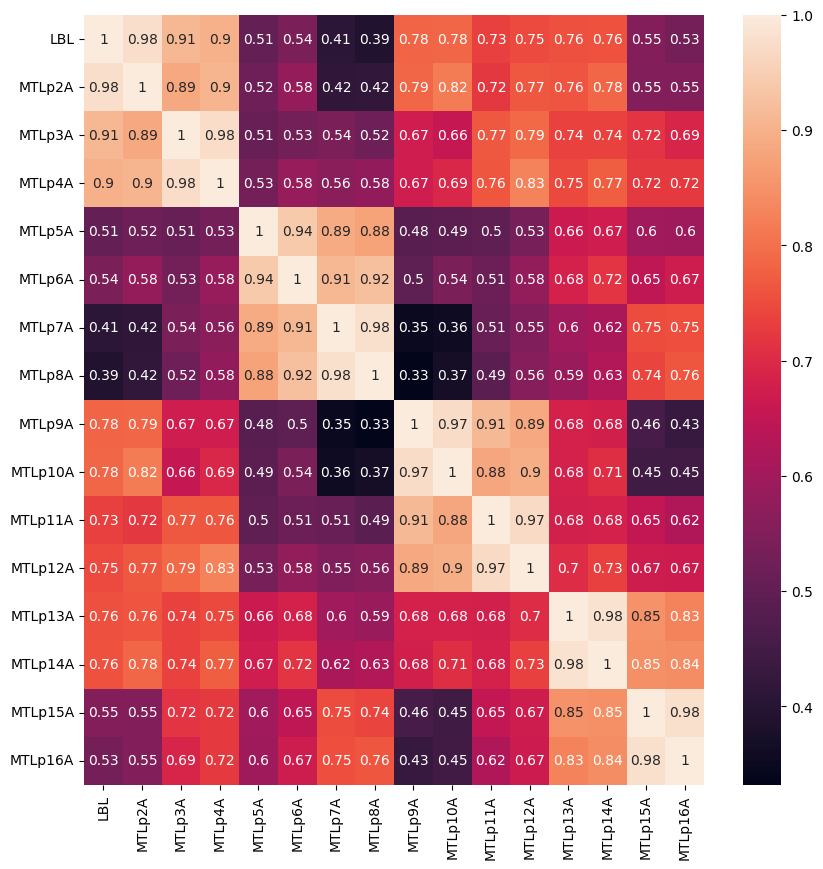

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
fig, ax = plt.subplots(figsize=(10,10))
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 139.06885322733092
MAE  is 100.2744463488122
rmse_per_output: [120.96370752 119.6317934  161.94774553 130.65017078  83.83331982
 119.2887539  120.8315633  148.46759685 129.11011643 157.97442933
 123.13031257 129.89929738 138.97023113 193.89111945 154.20353793
 157.97347396]
relative_root_mean_squared_error = 0.0022264637885353886
arrmse = 0.0022264637885353886
Percentage arrmse = 0.22%
